# 1. Optimization with Rosenbrock 

The Rosenbrock function (also known as Valley or Banana function) is given by 

$$ f(x,y) = (1-x)^2 + 100(y - x^2)^2 \, . $$

and is a popular test function for optimization algorithms. The Rosenbrock function is a non-convex function and has a unique minimum in 2D: 

$$f(1,1)=0 \, .$$ 

This minimum lies in a narrow parabolic valley and although the valley is easy to find, convergence to the minimum is difficult. To get an idea what the Rosenbrock function looks like, we first plot it: 

In [2]:
import numpy as np
import scipy.linalg as la
from scipy.optimize import minimize, OptimizeResult
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [3]:
def rosenbrock(x):
    value = (1-x[0])**2 + 100*(x[1]-x[0]**2)**2 
    return value

def rosenbrock_xy(x,y):
    return rosenbrock((x,y))

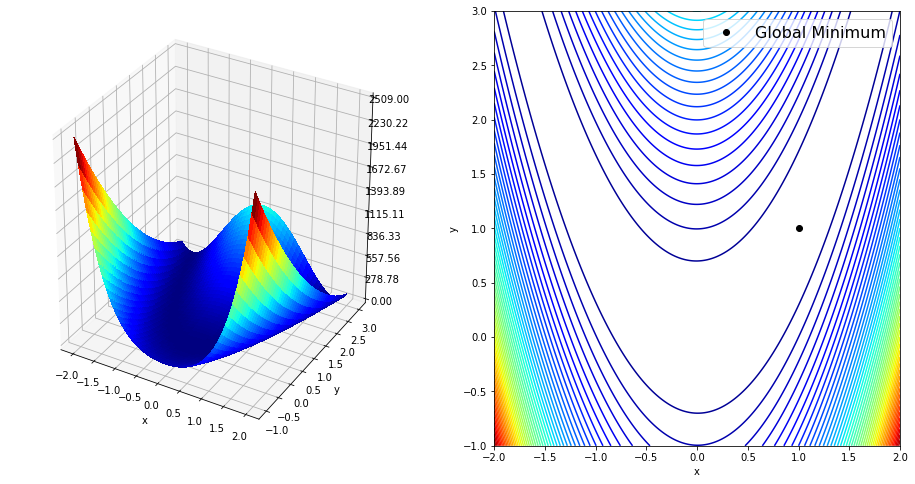

In [4]:
def plot_rosenbrock():
    "Draw a surface and contour plot of the Rosenbrock function on [-2,2]x[-1,3]"
    xx = np.linspace(-2,2,250)
    yy = np.linspace(-1,3,250)
    X, Y = np.meshgrid(xx, yy)
    Z = rosenbrock_xy(xx[None,:], yy[:,None])
    fig = plt.figure(figsize = (16,8))
    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='jet',
                       linewidth=0, antialiased=False)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.contour(X,Y,Z, 50, cmap = 'jet')
    ax.plot(1, 1, 'ko', label = "Global Minimum")
    ax.legend(prop={"size":16})
    return fig, ax

# Draw plot of Rosenbrock function with global minimum
fig, ax = plot_rosenbrock()

We also have the analytical gradient and the analytical Hessian available, which will help us here for the optimization: the gradient reads

$$
 \nabla f(x,y) = \begin{pmatrix} 400 x^3 - 400xy + 2x-2 \\
 200(y-x^2) \end{pmatrix}
$$
and the hessian reads
$$
  H(x,y) = \begin{pmatrix} 1200 x^2 - 400y + 2 & -400 x \\
 -400 x & 200 \end{pmatrix}.
$$

In [5]:
#define analytic gradient of rosenbrock function
def rosenbrock_grad(x):
    fx = -400*x[0]*x[1] + 400*x[0]**3 + 2*x[0] -2
    fy = 200*x[1] -200*x[0]**2
    return np.array([fx,fy])

#define analytic gradient of rosenbrock function
def rosenbrock_hess(x):
    fxx = -400*x[1] + 1200*x[0]**2 + 2
    fxy = -400 * x[0]
    fyx = -400 * x[0]
    fyy = 200
    return np.array([[fxx,fxy],[fyx,fyy]])

### Question: 
- Why does the output of the code below guarantee you, that (1,1) is a minimum?

In [6]:
xmin = np.array([1,1])
print('Gradient at minimum:',rosenbrock_grad(xmin))
print('Hessian at minimum:',rosenbrock_hess(xmin))
print('Eigenvalues at minimum:',la.eigh(rosenbrock_hess(xmin))[0])

Gradient at minimum: [0 0]
Hessian at minimum: [[ 802 -400]
 [-400  200]]
Eigenvalues at minimum: [3.99360767e-01 1.00160064e+03]


Let's forget for a moment that we have those analytic derivatives available - what we could always do is a finite difference approximation.  

We will use centered finite difference approximation for a first derivative

$$
  \frac{\partial}{\partial x}f(x,y) \approx \frac{f(x+h,y)-f(x-h,y)}{2h} + O(h^2), \qquad
  \frac{\partial}{\partial y}f(x,y) \approx \frac{f(x,y+h)-f(x,y-h)}{2h} + O(h^2),
$$

and we can similarly derive a finite difference approximation for the second derivative

$$
  \frac{\partial}{\partial xx}f(x,y) \approx \frac{f(x+h,y)-2f(x,y)+f(x-h,y)}{h^2} + O(h^2), \qquad
  \frac{\partial}{\partial yy}f(x,y) \approx \frac{f(x,y+h)-2f(x,y)+f(x,y-h)}{h^2} + O(h^2), \\
  \frac{\partial}{\partial xy}f(x,y) \approx \left(\frac{f(x+h,y+h)-f(x+h,y-h)}{2h} - \frac{f(x-h,y+h)-f(x-h,y-h)}{2h} \right)/(2h) + O(h^2).
$$

Some sense of magnitudes is useful in cases like this.  The second derivative
gets pretty big for values of $x,y$ near zero, and there is a lot of cancellation
in these formulas, so we don't necessarily expect that a tiny finite difference step
will give great results.  Fortunately, we are not currently using the finite
difference formulas in lieu of the true derivatives, but as a sanity check to
make sure that we did not swap a negative sign or add a factor of two somewhere.

### Task:
- Complete the finite difference gradient function rosenbrock_grad_fd(x,h).

In [7]:
# Finite difference gradient of Rosenbrock function
def rosenbrock_grad_fd(x,h):
    xph = np.array([x[0]+h,x[1]])
    xmh = np.array([x[0]-h,x[1]])
    yph = np.array([x[0],x[1]+h])
    ymh = np.array([x[0],x[1]-h])
    fdfx = (rosenbrock(xph)-rosenbrock(xmh))/2/h
    fdfy = # complete expression for the FD approximation of the rosenbrock derivative with respect for y
    return np.array([fdfx,fdfy])

# Finite difference Hessian of Rosenbrock function
def rosenbrock_hess_fd(x,h):
    xph = np.array([x[0]+h,x[1]])
    xmh = np.array([x[0]-h,x[1]])
    yph = np.array([x[0],x[1]+h])
    ymh = np.array([x[0],x[1]-h])
    xpyp = np.array([x[0]+h,x[1]+h])
    xpym = np.array([x[0]+h,x[1]-h])
    xmyp = np.array([x[0]-h,x[1]+h])
    xmym = np.array([x[0]-h,x[1]-h])
    fdfxx = (rosenbrock(xph)-2*rosenbrock(x)+rosenbrock(xmh))/h**2
    fdfxy = ((rosenbrock(xpyp)-rosenbrock(xpym))/2/h-(rosenbrock(xmyp)-rosenbrock(xmym))/2/h)/2/h
    fdfyx = fdfxy
    fdfyy = (rosenbrock(yph)-2*rosenbrock(x)+rosenbrock(ymh))/h**2
    return np.array([[fdfxx,fdfxy],[fdfyx,fdfyy]])

In [8]:
#Sanity check 
xgrid = np.linspace(-1,1,20)
ygrid = np.linspace(-1,1,20)
X1,Y1 = np.meshgrid(xgrid,ygrid)
res_grad = np.zeros_like(X1)
res_hess = np.zeros_like(X1)
h = 1e-4;

for i in range(0,X1.shape[0]):
	for j in  range(0,X1.shape[1]):
		res_grad[i,j] = np.linalg.norm(rosenbrock_grad(np.array([X1[i,j],Y1[i,j]]))-rosenbrock_grad_fd(np.array([X1[i,j],Y1[i,j]]),h))
		res_hess[i,j] = np.linalg.norm(rosenbrock_hess(np.array([X1[i,j],Y1[i,j]]))-rosenbrock_hess_fd(np.array([X1[i,j],Y1[i,j]]),h))
print('Maximum difference in gradient:', np.max(res_grad))
print('Maximum difference in hessian:', np.max(res_hess))

Maximum difference in gradient: 4.0000450264321345e-06
Maximum difference in hessian: 2.3006465206885217e-05


We can also check the optimality conditions at the minumum $(1,1)$ with the approximated gradient and Hessian.

In [10]:
# sanity check at minimum
xmin = np.array([1,1])
h = 1e-4
print('Gradient at minimum:',rosenbrock_grad_fd(xmin,h))
print('Hessian at minimum:',rosenbrock_hess_fd(xmin,h))
print('Eigenvalues at minimum:',la.eigh(rosenbrock_hess_fd(xmin,h))[0])

Gradient at minimum: [4.e-06 0.e+00]
Hessian at minimum: [[ 802.000002 -400.      ]
 [-400.        200.      ]]
Eigenvalues at minimum: [3.99361166e-01 1.00160064e+03]


## 1.1 Comparing the performance of different optimization algorithms for Rosenbrock



We would like to compare different optimizer for the Rosenbrock function. Starting with the comparison of a (simple) gradient descent method compared to a Newton method. Let us first define the gradient descent: 

In [335]:
def gradient_descent(fun, x0, args=(), lambda_des=0.0005, maxiter=100000, tol=1e-6, callback=None, **options):
    xk = x0
    f_xk = fun(x0)
    niter = 0
    improved = True
    step = 10

    while la.norm(step) > tol and niter < maxiter:
        niter += 1
        step = lambda_des * rosenbrock_grad(xk)
        xk = xk - step
        f_xk = fun(xk)

        if callback is not None:
            callback(xk)

    return OptimizeResult(fun=f_xk, x=xk, nit=niter)


Next, we call the gradient descent and the Newton method with the same initial value. We trace back the x-values the opmizer takes and plot those in two contour plots.

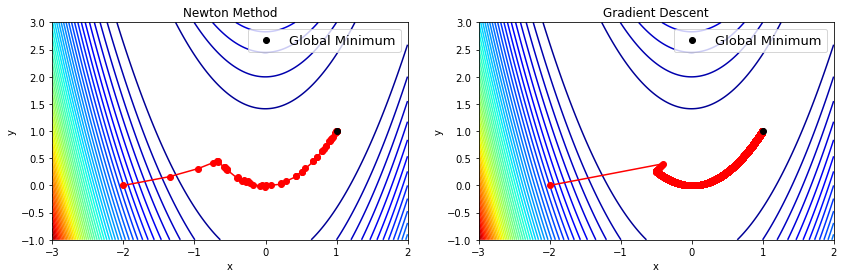

Number of iterations for Newton: 57
Minimum function value for Newton: 1.0504648197504748e-18
Number of iterations for Gradient Descent: 25130
Minimum function value for for Gradient Descent: 4.986513760114278e-06


In [346]:
# function to trace back all steps the optimizer takes
def call_back(p):
    global ps
    ps.append(p)

"Compares the Newton method and the gradient descent method on [-2,2]x[-1,3] with starting value x0"
"Prints number of iterations and function value at stopped x-value"
# starting value    
x0 = np.array([-2,0])
ps = [x0];

# finite differences gradient and Hessian
f_rosen_gfd = lambda x: rosenbrock_grad_fd(x,h)
f_rosen_hfd = lambda x: rosenbrock_hess_fd(x,h)

# minimize with Newton
res = minimize(rosenbrock, ps, method = 'Newton-CG', jac= rosenbrock_grad, hess = rosenbrock_hess, tol=1e-6,callback=call_back)
ps = np.array(ps)
# Contour plot
xx = np.linspace(-3,2,250)
yy = np.linspace(-1,3,250)
X, Y = np.meshgrid(xx, yy)
Z = rosenbrock(np.vstack([X.ravel(), Y.ravel()])).reshape((250,250))
# Plot comparison of two optimization methods
fig = plt.figure(figsize = (14,4))
ax = fig.add_subplot(1, 2, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.contour(X,Y,Z, 50, cmap = 'jet')
ax.plot(ps[:, 0], ps[:, 1], '-ro')
ax.plot(1, 1, 'ko', label = "Global Minimum")
ax.legend(prop={"size":13})
ax.title.set_text('Newton Method')
ps = [x0];
# minimize with gradient descent
res_gd = minimize(rosenbrock, x0, method= gradient_descent, callback=call_back)
ps = np.array(ps)
# Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.contour(X,Y,Z, 50, cmap = 'jet')
ax.plot(ps[:, 0], ps[:, 1], '-ro')
ax.plot(1, 1, 'ko', label = "Global Minimum")
ax.legend(prop={"size":13})
ax.title.set_text('Gradient Descent')
plt.show()

print('Number of iterations for Newton:', res.nit )
print('Minimum function value for Newton:', res.fun)
print('Number of iterations for Gradient Descent:', res_gd.nit)
print('Minimum function value for for Gradient Descent:', res_gd.fun)   

### Tasks:
- Explain the observed behavior.
- Try different points for the starting value. 
- Scipy has a couple of gradient/hessian based minimizer (i.e., BFGS, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize). 
 Choose one on the page and compare it to the Newton method. 

# 2. How close is curve to be self-intersecting?

When e.g., looking at the coils of a stellarator, we would like those to have certain properties in order to generate a good magnetic field. One of those properties is that we would like the coils to be non self-intersecting. A first step to find out if a coil is self-intersecting is, to map the coil onto $\mathbb{R}^2$, i.e., the coil being a closed curve in $\mathbb{R}^2$, and define a measure of "closeness".  

For the description of the curves, we will work with parametric cubic splines. 

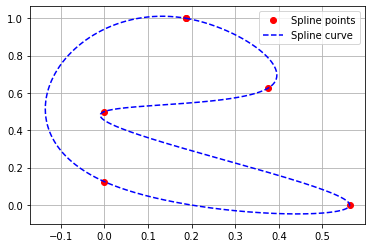

In [316]:
from scipy.interpolate import splprep, splev
from scipy import integrate

cv = np.array([[ 1.5/8,  8./8],
   [ 3./8,  5./8],
   [ -0./8,  4./8], 
   [ 4.5/8,   0.],
   [ 0.,   1./8],
   [ 0.,   4./8]])

tck, u = splprep(cv.T, u=None, s=0.0, per=1, quiet = 2) 
u_new = np.linspace(u.min(), u.max(), 1000)
x_new, y_new = splev(u_new, tck, der=0)

plt.plot(cv[:,0], cv[:,1], 'ro', label = "Spline points")
plt.plot(x_new, y_new, 'b--', label = "Spline curve")
plt.grid()
plt.legend()
plt.show()

A natural first choice might be to optimize the euclidean distance between two points $X(x_1,x_2), Y(y_1,y_2) \in \mathbb{R}^2$ and see how close the are in order to measure closeness of intersection
$$
f_{\text{euclid}}(x,y):= \sqrt{(y_1-x_1)^2 + (y_2-x_2)^2} \, .
$$

In [317]:
# euclidean distance	
def objective_euclidean_spline(tck, u_vals):
	# get points from spline for computation
	x0, y0 = splev(u_vals[0], tck, der=0)
	x1, y1 = splev(u_vals[1], tck, der=0)

	if u_vals[0] < 0 or u_vals[1] < 0:	# penalty value if out of bounds
		dist = 1000
	elif u_vals[0] > 1 or u_vals[1] > 1 :	
		dist = 1000		
	elif (u_vals[0] == 0 and u_vals[1]==1) or (u_vals[1] == 0 and u_vals[0]==1): 
		dist = 1     
	elif x0 == x1 and y0 == y1 : #same point
		dist = 1;	
	else:
		dist = np.sqrt((x0-x1)**2 + (y0-y1)**2)
	return dist

Although, this might not be the best thing to do...

### Question: 
- Before running the code - what two points do you expect to be closest?

Closest points are: (0.1993333570323318, 0.9947369172426642) and (0.1993532137194937, 0.9947272508224348)
With euclidean distance:  2.2084558068844612e-05


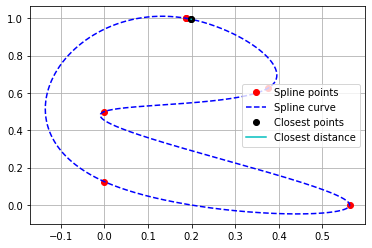

In [318]:
f_euclidean = lambda x: objective_euclidean_spline(tck,x) 
u0 = [0.0,0.16];
res = minimize(f_euclidean, u0, method='Nelder-Mead')
x1, y1 = splev(res.x[0], tck, der=0)
x2, y2 = splev(res.x[1], tck, der=0)

print('Closest points are: ({0}, {1}) and ({2}, {3})'.format(x1, y1, x2, y2))
print('With euclidean distance: ', res.fun )

x_plot = [x1,x2]
y_plot = [y1,y2]

plt.plot(cv[:,0], cv[:,1], 'ro', label = "Spline points")
plt.plot(x_new, y_new, 'b--', label = "Spline curve")
plt.plot(x_plot, y_plot, 'ko', label = "Closest points")
plt.plot(x_plot,y_plot, 'c', label = "Closest distance")
plt.grid()
plt.legend()

plt.show()

So what we need is some different measure to penalize points which are close to each other but still on the curve. One idea is to use the regularized measure

$$
f_{\text{regularized}}(x,y):= \frac{\text{euclidean length}}{\text{arc length}} = \frac{\sqrt{(y_1-x_1)^2 + (y_2-x_2)^2}}{\int_{x}^{y}\left(1 + (f'(u))^2\right) du}
$$

where the arc length is to shortest distance of two points on the curve (with f(u) refering to the spline curve here). 

In [319]:
def objective_regularized_spline(tck, u_vals):
	# get points from spline for computation
	x0, y0 = splev(u_vals[0], tck, der=0)
	x1, y1 = splev(u_vals[1], tck, der=0)

	if u_vals[0] < 0 or u_vals[1] < 0:	
		dist = 1000
	elif u_vals[0] > 1 or u_vals[1] > 1 :	
		dist = 1000	
	elif (u_vals[0] == 0 and u_vals[1]==1) or (u_vals[1] == 0 and u_vals[0]==1): 
		dist = 1 
	elif x0 == x1 and y0 == y1 : #same point
		dist = 1;	    
	else:
		#compute arc length
		full_length = integrate.quad(lambda x: np.sqrt((splev(x, tck, der=1)[0])**2 + (splev(x, tck, der=1)[1])**2 ), 0,1)[0]
		if u_vals[0] > u_vals[1]:
			arc_dist = integrate.quad(lambda x: np.sqrt((splev(x, tck, der=1)[0])**2 + (splev(x, tck, der=1)[1])**2 ), u_vals[1], u_vals[0])[0]
		else: 
			arc_dist = integrate.quad(lambda x: np.sqrt((splev(x, tck, der=1)[0])**2 + (splev(x, tck, der=1)[1])**2 ), u_vals[0], u_vals[1])[0]

		if arc_dist > full_length/2:
			arc_dist = full_length - arc_dist	

		euclid_dist = np.sqrt((x0-x1)**2 + (y0-y1)**2)
		dist = euclid_dist/arc_dist
	return dist	

### Questions:
- What does this measure change in terms of objective values? What value do you expect from two points which are close on the curve?
- Run the code for the different initial points $u_0 = [0,0.16]$, $u_1= [0.3, 0.8]$, $u_2 = [0,0]$. What do you observe? 

Closest points are: (0.18750016435954597, 0.9999999339196732) and (0.024897247484896773, 0.5134250682593658)
With regularized distance:  0.6151104062309828


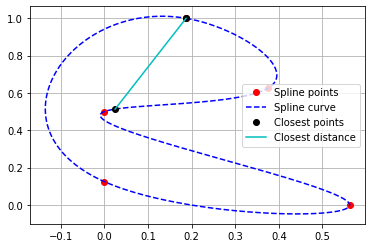

In [320]:
f_regularized = lambda x: objective_regularized_spline(tck,x)
u0 = [0.0,0.16];
res = minimize(f_regularized, u0, method='Nelder-Mead')
x1, y1 = splev(res.x[0], tck, der=0)
x2, y2 = splev(res.x[1], tck, der=0)

print('Closest points are: ({0}, {1}) and ({2}, {3})'.format(x1, y1, x2, y2))
print('With regularized distance: ', res.fun )

x_plot = [x1,x2]
y_plot = [y1,y2]

plt.plot(cv[:,0], cv[:,1], 'ro', label = "Spline points")
plt.plot(x_new, y_new, 'b--', label = "Spline curve")
plt.plot(x_plot, y_plot, 'ko', label = "Closest points")
plt.plot(x_plot,y_plot, 'c', label = "Closest distance")
plt.grid()
plt.legend()
plt.show()

It's always a good to get an idea of what your objective function looks like (if possible), e.g., do we have a narrow valley, many local minima or can a global minimum easily be identified? Let's plot the objective function on a grid:

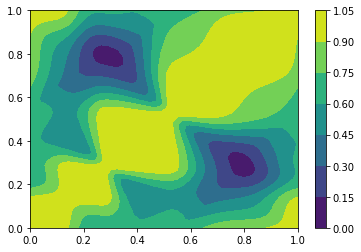

In [321]:
u_lin1 = np.linspace(0,1,30)
u_lin2 = np.linspace(0,1,30)
X,Y = np.meshgrid(u_lin1,u_lin2)
objective_values = np.zeros_like(X)

for i in range(0,X.shape[0]):
	for j in  range(0,X.shape[1]):
		objective_values[i,j] = objective_regularized_spline(tck,np.array([X[i,j],Y[i,j]]))
        
plt.contourf(X,Y,objective_values)
plt.colorbar()
plt.show()

### Questions: 
- What structure do you observe of the plotted objective function?
- The above curve is not self-intersecting - change the third spline point from $[ -0./8,  4./8]$ to $[ -1./8,  4./8]$ and redo the regularized distance calculation. 